# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

在此项目中，您将从CIFAR-10数据集中分类图像。 数据集由飞机，狗，猫和其他物体组成。 您将对图像进行预处理，然后在所有样本上训练卷积神经网络。 图像需要归一化，标签需要进行一次热编码。 你会得到应用你学到的东西，并构建一个卷积的，最大化的，最大的汇总和完全连接的层。 最后，您将看到您的神经网络对样本图像的预测。

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

CIFAR-10 Dataset: 171MB [00:35, 4.80MB/s]                           


All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.

828/5000
数据集分为批次，以防止您的计算机内存不足。 CIFAR-10数据集由5批次命名为“data_batch_1”，“data_batch_2”等。每批包含以下标签和图像之一：
* 飞机
* 汽车
* 鸟
* 猫
* 鹿
* 狗
* 青蛙
* 马
* 船
* 卡车

了解数据集是对数据进行预测的一部分。 通过更改“batch_id”和“sample_id”来播放下面的代码单元格。 `batch_id`是批处理的id（1-5）。 “sample_id”是批次中图像和标签对的ID。

问自己“什么是所有可能的标签？”，“图像数据的值范围是多少？”，“标签是按顺序还是随机？ 对这些问题的回答将有助于您预处理数据，并最终获得更好的预测。

/home/kangfei/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/kangfei/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')



Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


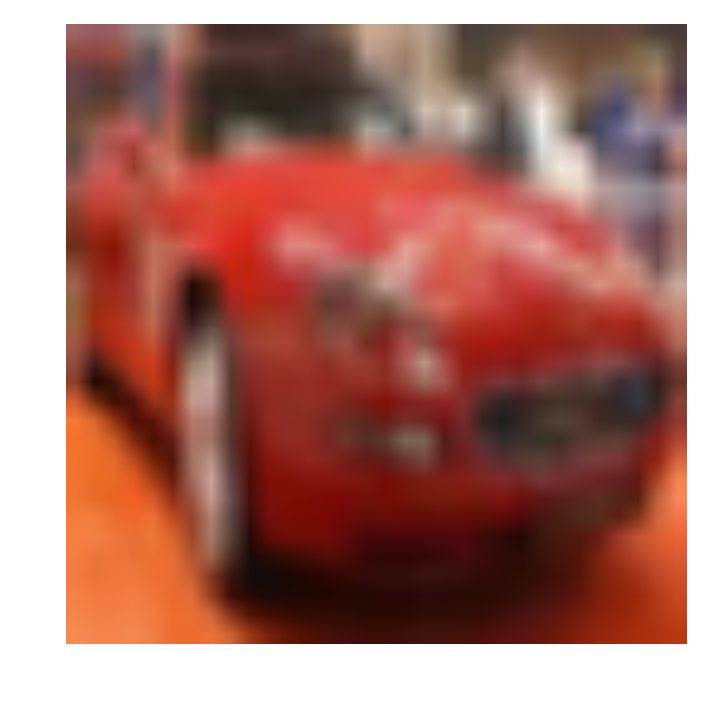

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

在下面的单元格中，实现`normalize`函数来获取图像数据`x`，并将其作为标准化的Numpy数组返回。 值应在0到1的范围内，包括0和1。 返回对象应与“x”相同。

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    x = np.array(x)
    min_x = x.min()
    max_x = x.max()
    x = (x-min_x)/(max_x-min_x)
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

就像之前的代码单元一样，你将会实现一个预处理功能。 这一次，你将实现`one_hot_encode`功能。 输入“x”是标签列表。 实现函数将标签列表作为One-Hot编码的Numpy数组返回。 标签的可能值为0到9.单热编码功能应在每个调用“one_hot_encode”之间返回相同的编码值。 确保将编码的地图保存在功能外。

提示：不要重新发明轮子。

In [4]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    n = len(x)
    one_hot = np.zeros((n,10))
    one_hot[np.arange(n),x]=1
    return one_hot


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

从上面的数据可以看出，样本的顺序是随机的。 再次对它进行随机化并不会伤害，但是您不需要为此数据集。

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

## 预处理所有数据并保存
运行下面的代码单元将预处理所有CIFAR-10数据并将其保存到文件中。 下面的代码也使用10％的训练数据进行验证。

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

# 检查点
这是你的第一个检查点。 如果你决定回到笔记本电脑或者重新启动笔记本电脑，你可以从这里开始。 预处理数据已保存到磁盘。

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

## 建立网络
对于神经网络，您将构建每个层为一个函数。 你看到的大部分代码都不在功能之内。 要更彻底地测试代码，我们要求您将每个层都放在一个函数中。 这使我们能够在提交项目之前，使用我们的单位测试，为您提供更好的反馈和测试简单的错误。

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
神经网络需要读取图像数据，单热编码标签和丢弃保持概率。 实现以下功能
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [7]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    shape = list(image_shape)
    print(shape)
    shape.insert(0,None)
    
    return tf.placeholder(tf.float32,shape,name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32,[None,n_classes],name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32,name='keep_prob')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

[32, 32, 3]
Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

### 卷积和最大池集合
卷积层在图像上取得了很大的成功。对于这个代码单元格，你应该实现函数“conv2d_maxpool”来应用卷积，然后应用最大化池：
* 使用“conv_ksize”，“conv_num_outputs”和“x_tensor”的形状创建权重和偏差。
* 使用weight和`conv_strides'对“x_tensor”应用卷积。
* 我们建议您使用相同的填充，但欢迎使用任何填充。
* 增加偏见
* 向卷积添加非线性激活。
* 使用`pool_ksize`和`pool_strides'应用最大池。
* 我们建议您使用相同的填充，但欢迎使用任何填充。

**注意：**您**不能使用[TensorFlow层]（https://www.tensorflow.org/api_docs/python/tf/layers）或[TensorFlow层（contrib）]（https：/ /www.tensorflow.org/api_guides/python/contrib.layers）**这个**层，但你仍然可以使用TensorFlow的[神经网络]（https://www.tensorflow.org/api_docs/python/tf/ nn）包。您仍然可以使用所有**其他**层的快捷方式选项。

In [8]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    f_w = tf.Variable(tf.truncated_normal((conv_ksize[0],conv_ksize[1],x_tensor.get_shape().as_list()[3],conv_num_outputs),
                                         stddev=0.1))
    f_b = tf.Variable(tf.zeros(conv_num_outputs))
    c_strides =[1,conv_strides[0],conv_strides[1],1]
    padding='SAME'
    x_tensor = tf.nn.conv2d(x_tensor,f_w,c_strides,padding)+f_b
    x_tensor = tf.nn.relu(x_tensor)
    p_ksize = [1,pool_ksize[0],pool_ksize[1],1]
    p_strides = [1,pool_strides[0],pool_strides[1],1]
    x_tensor = tf.nn.max_pool(x_tensor,p_ksize,p_strides,padding)
    return x_tensor


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

实现“flatten”功能，将“x_tensor”的维度从4-D张量更改为2-D张量。 输出应为形状（* Batch Size *，* Flattened Image Size *）。 快捷方式选项：您可以使用[TensorFlow层]（https://www.tensorflow.org/api_docs/python/tf/layers）或[TensorFlow层（contrib）]（https://www.tensorflow.org）中的类 /api_guides/python/contrib.layers）包。 对于更多的挑战，只能使用其他TensorFlow软件包。

In [9]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    return tf.contrib.layers.flatten(x_tensor)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

### 全连接层
实现`fully_conn`函数，使用形状（* Batch Size *，* num_outputs *）将完全连接的图层应用于`x_tensor`。 快捷方式选项：您可以使用[TensorFlow层]（https://www.tensorflow.org/api_docs/python/tf/layers）或[TensorFlow层（contrib）]（https://www.tensorflow.org）中的类 /api_guides/python/contrib.layers）包。 对于更多的挑战，只能使用其他TensorFlow软件包。

In [10]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    shape = x_tensor.get_shape().as_list()
    fully_w = tf.Variable(tf.truncated_normal((shape[1],num_outputs),stddev=0.1))
    fully_b = tf.Variable(tf.zeros(num_outputs))
    return tf.nn.relu(tf.add(tf.matmul(x_tensor, fully_w), fully_b))
    #return tf.nn.tanh(tf.matmul(x_tensor,fully_w)+fully_b)
 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

### 输出层
实现`output`函数，使用形状（* Batch Size *，* num_outputs *）将完全连接的图层应用于`x_tensor`。 快捷方式选项：您可以使用[TensorFlow层]（https://www.tensorflow.org/api_docs/python/tf/layers）或[TensorFlow层（contrib）]（https://www.tensorflow.org）中的类 /api_guides/python/contrib.layers）包。 对于更多的挑战，只能使用其他TensorFlow软件包。

**注意：**激活，softmax或交叉熵应该**不适用于此。

In [11]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    shape = x_tensor.get_shape().as_list()
    fully_w = tf.Variable(tf.truncated_normal((shape[1],num_outputs),stddev=0.1))
    fully_b = tf.Variable(tf.zeros(num_outputs))
    return tf.nn.relu(tf.matmul(x_tensor,fully_w)+fully_b)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

### 创建卷积模型
实现函数“conv_net”来创建卷积神经网络模型。 该函数接收一批图像`x`，并输出逻辑。 使用上面创建的图层创建此模型：

* 应用1，2或3卷积和最大池层
* 应用平铺层
* 应用1，2或3个完全连接的图层
* 应用输出层
* 返回输出
* 使用`keep_prob`将[TensorFlow's Dropout]（https://www.tensorflow.org/api_docs/python/tf/nn/dropout）应用于模型中的一个或多个图层。

In [12]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    x_tensor = conv2d_maxpool(x,16,(2,2),(1,1),(2,2),(2,2))
    x_tensor = conv2d_maxpool(x_tensor,32,(2,2),(1,1),(2,2),(2,2))

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    x_tensor = flatten(x_tensor)
    

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    x_tensor = fully_conn(x_tensor,20)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    x_tensor = tf.nn.dropout(x_tensor,keep_prob)
    
    # TODO: return output
    x_tensor = fully_conn(x_tensor,10)
    
    return x_tensor


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

[32, 32, 3]
Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

## 训练神经网络
### 单优化
实现函数`train_neural_network`进行单个优化。 优化应该使用`optimizer`来在`session`中用`feed_dict`进行优化，
* `x`用于图像输入
* `y`用于标签
* `keep_prob`保留遗漏的概率

将为每个批次调用此函数，因此`tf.global_variables_initializer（）`已被调用。

注意：没有任何东西需要退回。 这个功能只是优化神经网络。

In [13]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer,feed_dict={keep_prob:keep_probability,x:feature_batch,y:label_batch})


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

### 显示统计资料
实现函数print_stats来打印丢失和验证精度。 使用全局变量“valid_features”和“valid_labels”来计算验证精度。 使用“1.0”的保持概率来计算损失和验证精度。

In [14]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    cost_v = session.run(cost,feed_dict={keep_prob:1.0,x:feature_batch,y:label_batch})
    accuracy_v = session.run(accuracy,feed_dict={keep_prob:1.0,x:valid_features,y:valid_labels})
    print("cost = {}, accuracy={}".format(cost_v,accuracy_v))

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

### 超参数
调整以下参数：
* 将'epochs'设置为迭代次数，直到网络停止学习或开始过度拟合
* 将`batch_size'设置为您的机器具有内存的最高数字。 大多数人将它们设置为通用大小的内存：
  * 64
  * 128
  * 256
  * ...
* 将`keep_probability`设置为保持节点使用退出的概率

In [15]:
# TODO: Tune Parameters
epochs = 50
batch_size = 128
keep_probability = 0.5

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

### 在单个CIFAR-10批次上训练
而不是在所有CIFAR-10批次的数据上训练神经网络，我们来使用一个批次。 这样可以节省时间，同时对模型进行迭代以获得更好的准确性。 一旦验证的最终准确度为50％或更高，请在下一节中对所有数据运行模型。

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  cost = 2.2404544353485107, accuracy=0.19859999418258667
Epoch  2, CIFAR-10 Batch 1:  cost = 2.179619312286377, accuracy=0.25760000944137573
Epoch  3, CIFAR-10 Batch 1:  cost = 2.139711380004883, accuracy=0.28600001335144043
Epoch  4, CIFAR-10 Batch 1:  cost = 2.0997090339660645, accuracy=0.3248000144958496
Epoch  5, CIFAR-10 Batch 1:  cost = 2.0733203887939453, accuracy=0.334199994802475
Epoch  6, CIFAR-10 Batch 1:  cost = 2.028212070465088, accuracy=0.3499999940395355
Epoch  7, CIFAR-10 Batch 1:  cost = 2.0285537242889404, accuracy=0.3723999857902527
Epoch  8, CIFAR-10 Batch 1:  cost = 1.9802913665771484, accuracy=0.36640000343322754
Epoch  9, CIFAR-10 Batch 1:  cost = 1.9675270318984985, accuracy=0.3831999897956848
Epoch 10, CIFAR-10 Batch 1:  cost = 1.9440809488296509, accuracy=0.3822000026702881
Epoch 11, CIFAR-10 Batch 1:  cost = 1.9167773723602295, accuracy=0.39079999923706055
Epoch 12, CIFAR-10 Batch 1:  cos

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

### 完全训练模型
现在您使用单个CIFAR-10批次获得了良好的准确性，请尝试使用所有五批次。

In [17]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  cost = 2.2849295139312744, accuracy=0.15940000116825104
Epoch  1, CIFAR-10 Batch 2:  cost = 2.2451889514923096, accuracy=0.19580000638961792
Epoch  1, CIFAR-10 Batch 3:  cost = 2.116825819015503, accuracy=0.21320000290870667
Epoch  1, CIFAR-10 Batch 4:  cost = 2.180206537246704, accuracy=0.23739999532699585
Epoch  1, CIFAR-10 Batch 5:  cost = 2.102851390838623, accuracy=0.2896000146865845
Epoch  2, CIFAR-10 Batch 1:  cost = 2.1548569202423096, accuracy=0.3102000057697296
Epoch  2, CIFAR-10 Batch 2:  cost = 2.0521137714385986, accuracy=0.3140000104904175
Epoch  2, CIFAR-10 Batch 3:  cost = 1.9084933996200562, accuracy=0.30979999899864197
Epoch  2, CIFAR-10 Batch 4:  cost = 1.969374418258667, accuracy=0.31439998745918274
Epoch  2, CIFAR-10 Batch 5:  cost = 1.9087482690811157, accuracy=0.3343999981880188
Epoch  3, CIFAR-10 Batch 1:  cost = 2.086244821548462, accuracy=0.3467999994754791
Epoch  3, CIFAR-10 Batch 2:  cost = 1.8869984149932861, accurac

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

根据测试数据集测试您的模型。 这将是您的最终准确性。 你的准确度应该超过50％。 如果没有，请继续调整模型体系结构和参数。

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.567939082278481



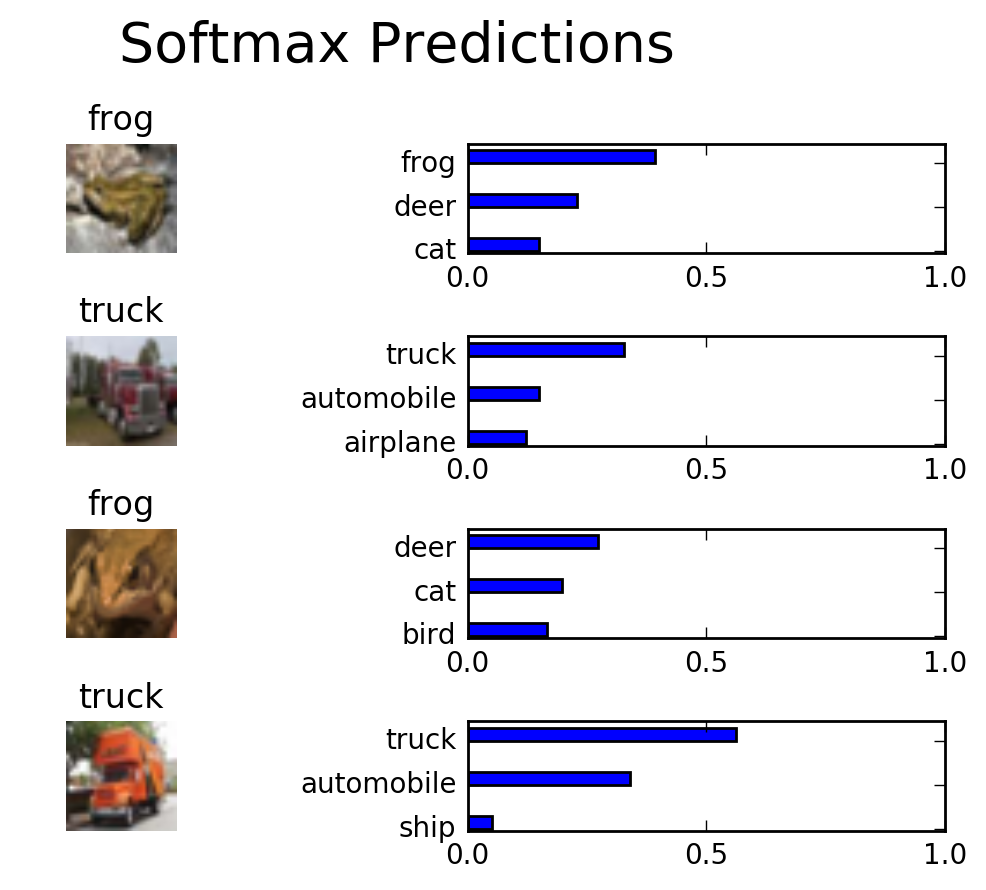

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.

## 为什么选择50-80％的准确度？
你可能会想知道为什么你不能得到更高的准确度。 首先，一个简单的CNN是50％不错。 纯粹的猜测会让你10％的准确性。 不过，您可能会注意到，人们获得的分数（高于80％）（http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130）。 那是因为我们没有教过你所有有关神经网络的知识。 我们还需要再多一些技巧。
## 提交本项目
提交此项目时，请确保在保存笔记本计算机之前运行所有单元格。 将笔记本文件保存为“dlnd_image_classification.ipynb”，并将其另存为“File” - >“Download as”下的HTML文件。 在您的提交中包含“helper.py”和“problem_unittests.py”文件。